In [359]:
import pandas as pd

#  Importing __Actors__ Ranking file which contains infromation for actors regarding their rankings,movie count.











In [360]:

csv_file_actors = pd.read_csv("D:\SpringBoard_Home\Capstone_Project_1\Data\BollywoodActorRanking.csv")


In [361]:
csv_file_actors.reset_index(drop = True)


,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
0,373,Aamir Khan,11,1170,9.44862,2460000,7.34283,10.00000
1,374,Shah Rukh Khan,23,2000,7.55009,2670000,7.88458,9.22674
2,375,Salman Khan,36,2340,5.40217,3490000,10.00000,9.20821
3,376,Katrina Kaif,17,1640,8.48082,2120000,6.46570,8.94852
4,377,Deepika Padukone,16,1080,5.64674,3000000,8.73591,8.62716
...,...,...,...,...,...,...,...,...
296,669,Achint Kaur,4,80,1.00000,0,NaN,1.00000
297,670,Yuvika Chaudhry,5,100,1.00000,0,NaN,1.00000
298,671,Pankaj Berry,5,100,1.00000,0,NaN,1.00000
299,672,Varun Dhawan,0,0,NaN,0,NaN,4.74000


In [362]:
csv_file_actors.describe()

,actorId,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
count,301.000000,301.000000,301.000000,299.000000,3.010000e+02,189.000000,301.000000
mean,523.000000,10.232558,419.136213,2.768970,3.741886e+05,2.533937,2.933339
std,87.035433,8.508764,446.972689,1.626970,6.647169e+05,1.951501,1.747883
min,373.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000,1.000000
25%,448.000000,5.000000,140.000000,1.489130,0.000000e+00,1.242680,1.709770
50%,523.000000,7.000000,260.000000,2.369570,7.640000e+04,1.638930,2.493970
75%,598.000000,12.000000,500.000000,3.621045,3.850000e+05,2.967520,3.559640
max,673.000000,54.000000,2950.000000,10.000000,3.490000e+06,10.000000,10.000000


In [363]:
csv_file_actors.info()

# normalizedMovieRank has 2 null values - Removed(Movies count were zero for two actors)
# normalisedGoogleRank has 112 null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   actorId               301 non-null    int64  
 1   actorName             301 non-null    object 
 2   movieCount            301 non-null    int64  
 3   ratingSum             301 non-null    int64  
 4   normalizedMovieRank   299 non-null    float64
 5   googleHits            301 non-null    int64  
 6   normalizedGoogleRank  189 non-null    float64
 7   normalizedRating      301 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 18.9+ KB


In [364]:
csv_file_actors.actorName.count()

301

=> Removing two rows where there are 0 movies counts and having __'NA'__ normalizedMovieRank.

In [365]:


csv_file_actors = csv_file_actors.dropna(subset = ['normalizedMovieRank'])

=> Replacing __"NA"__ with __"0"__ for normalizedGoogleRank column

In [366]:

csv_file_actors[csv_file_actors.normalizedGoogleRank.isnull()==True]
csv_file_actors['normalizedGoogleRank'].fillna(value = 0,inplace = True)
csv_file_actors

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
0,373,Aamir Khan,11,1170,9.44862,2460000,7.34283,10.00000
1,374,Shah Rukh Khan,23,2000,7.55009,2670000,7.88458,9.22674
2,375,Salman Khan,36,2340,5.40217,3490000,10.00000,9.20821
3,376,Katrina Kaif,17,1640,8.48082,2120000,6.46570,8.94852
4,377,Deepika Padukone,16,1080,5.64674,3000000,8.73591,8.62716
...,...,...,...,...,...,...,...,...
294,667,Tanvi Azmi,4,80,1.00000,0,0.00000,1.00000
295,668,Adi Irani,4,80,1.00000,0,0.00000,1.00000
296,669,Achint Kaur,4,80,1.00000,0,0.00000,1.00000
297,670,Yuvika Chaudhry,5,100,1.00000,0,0.00000,1.00000


# Actors with highest googlehits Rating

<BarContainer object of 15 artists>

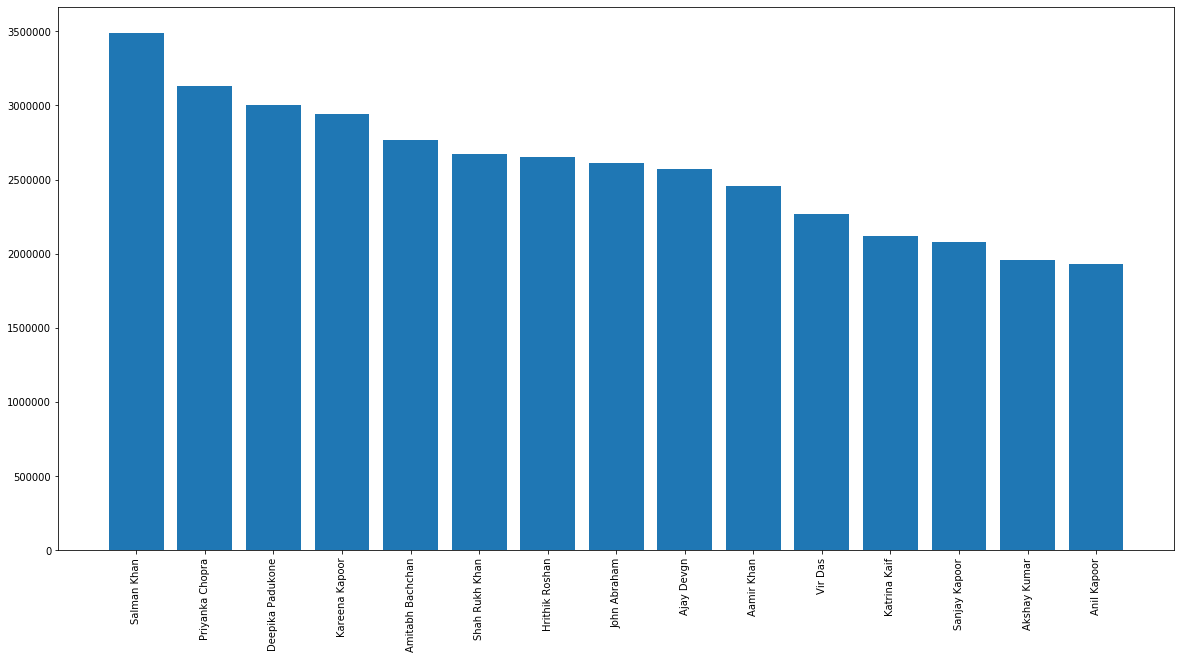

In [367]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)
plt.xticks(rotation = 'vertical')



Top15 = csv_file_actors.sort_values('googleHits',ascending = False)[:15]

Top15 = Top15.drop('actorId',axis = 1)

x = Top15['actorName']
y = Top15['googleHits']

plt.bar(x,y)

# Actors with best Normalized Rating

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

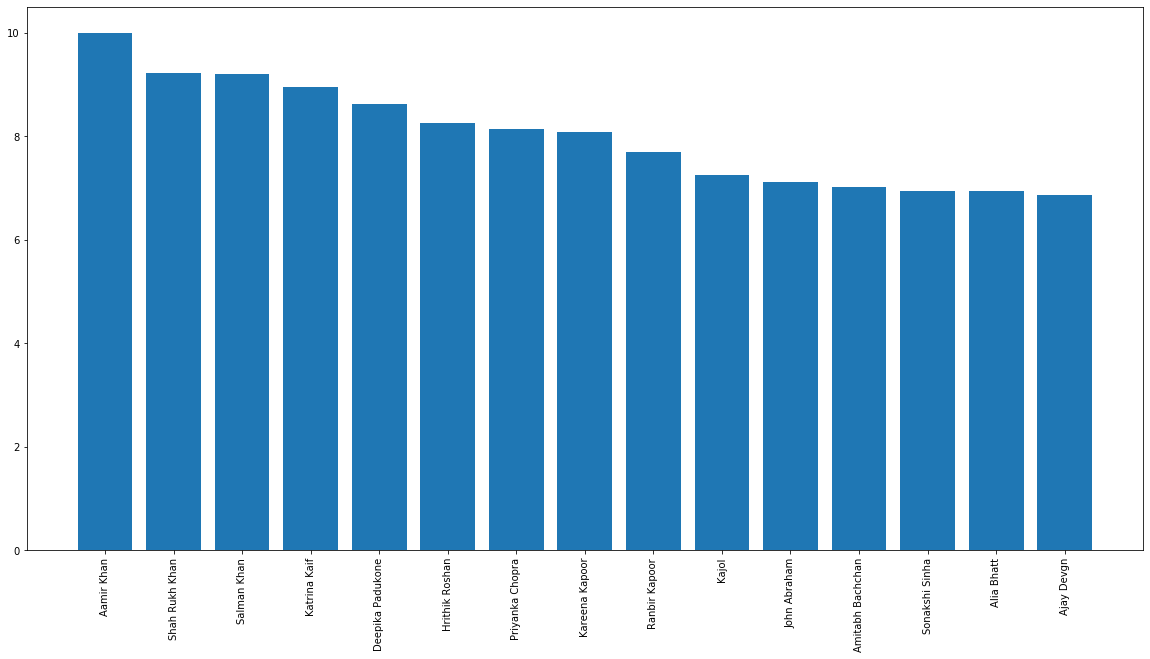

In [368]:
Top15 = csv_file_actors.sort_values('normalizedRating',ascending = False)[:15]

Top15 = Top15.drop('actorId',axis = 1)

x = Top15['actorName']
y = Top15['normalizedRating']

plt.bar(x,y)
plt.xticks(rotation = 'vertical')

# Director Ranking File with information for each director regarding movie count and other rankings

In [369]:
Directors = pd.read_csv("D:\SpringBoard_Home\Capstone_Project_1\Data\BollywoodDirectorRanking.csv")

In [370]:
Directors

,directorId,directorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
0,1,Rajkumar Hirani,3,440,10.00000,146000,2.07796,10.00000
1,2,Farah Khan,4,440,7.39474,1060000,8.88317,8.78473
2,3,Karan Johar,5,430,5.68947,1050000,8.80872,7.10460
3,4,Sajid Khan,4,350,5.79605,905000,7.72912,6.99780
4,5,Rohit Shetty,10,950,6.32895,437000,4.24461,6.83761
...,...,...,...,...,...,...,...,...
113,114,Shyam Ramsay,3,60,1.00000,9930,1.06485,1.01149
114,115,Jag Mundhra,3,60,1.00000,6710,1.04088,1.00681
115,116,Kalpana Lajmi,3,60,1.00000,4380,1.02353,1.00342
116,117,Ajay Chandhok,4,80,1.00000,2420,1.00893,1.00057


In [371]:
Directors.info()

## directorname has 1 null value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   directorId            118 non-null    int64  
 1   directorName          117 non-null    object 
 2   movieCount            118 non-null    int64  
 3   ratingSum             118 non-null    int64  
 4   normalizedMovieRank   118 non-null    float64
 5   googleHits            118 non-null    int64  
 6   normalizedGoogleRank  118 non-null    float64
 7   normalizedRating      118 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 7.5+ KB


In [372]:
NaN_directors = Directors[Directors.directorName.isnull()== True]

In [373]:
NaN_directors

,directorId,directorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
103,104,NaN,7,180,1.40602,0,0.0,1.20004


=> Removing row with "__null__" Director name

In [374]:
Directors = Directors.dropna()
Directors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 117
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   directorId            117 non-null    int64  
 1   directorName          117 non-null    object 
 2   movieCount            117 non-null    int64  
 3   ratingSum             117 non-null    int64  
 4   normalizedMovieRank   117 non-null    float64
 5   googleHits            117 non-null    int64  
 6   normalizedGoogleRank  117 non-null    float64
 7   normalizedRating      117 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 8.2+ KB


In [375]:
Directors.head()

,directorId,directorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
0,1,Rajkumar Hirani,3,440,10.00000,146000,2.07796,10.00000
1,2,Farah Khan,4,440,7.39474,1060000,8.88317,8.78473
2,3,Karan Johar,5,430,5.68947,1050000,8.80872,7.10460
3,4,Sajid Khan,4,350,5.79605,905000,7.72912,6.99780
4,5,Rohit Shetty,10,950,6.32895,437000,4.24461,6.83761


# Directors with highest googlhits

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

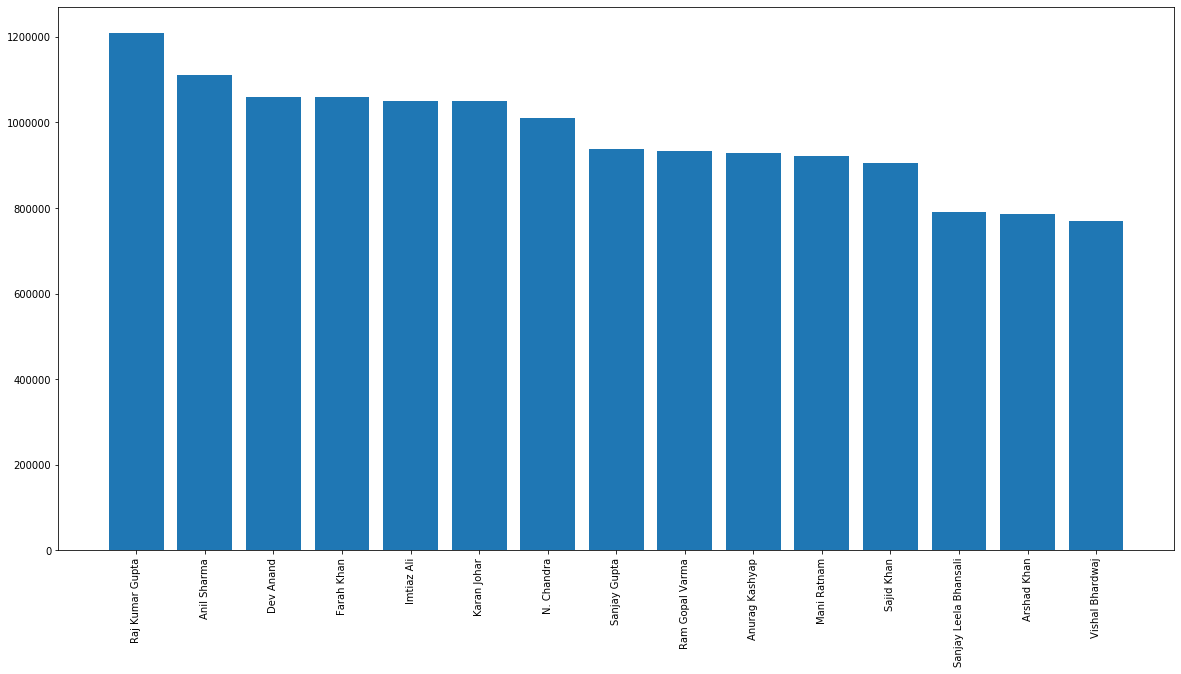

In [376]:
Top15_dir = Directors.sort_values('googleHits',ascending = False)[:15]

Top15_dir = Top15_dir.drop('directorId',axis = 1)

x = Top15_dir['directorName']
y = Top15_dir['googleHits']

plt.bar(x,y)
plt.xticks(rotation = 'vertical')

# Directors with best Normalized Rating

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

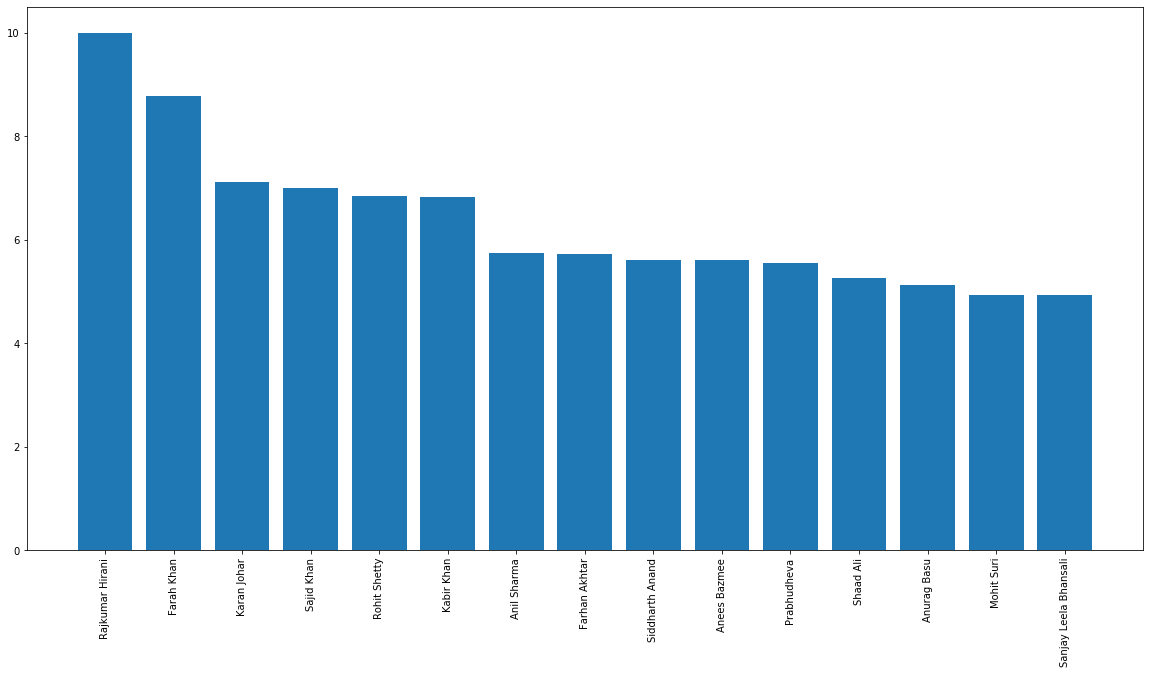

In [377]:
Top15_dir_rating = Directors.sort_values('normalizedRating',ascending = False)[:15]

Top15_dir_rating = Top15_dir_rating.drop('directorId',axis = 1)

x = Top15_dir_rating['directorName']
y = Top15_dir_rating['normalizedRating']

plt.bar(x,y)
plt.xticks(rotation = 'vertical')

# Movies File - Information for each movie

In [378]:

Movie = pd.read_csv("D:\SpringBoard_Home\Capstone_Project_1\Data\BollywoodMovieDetail.csv")

In [379]:
Movie

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1
...,...,...,...,...,...,...,...,...,...,...
1279,tt4121522,Shuruaat Ka Interval,2014,15 Aug 2014,NaN,Aarti S. Bagdi | Amrit Raj Gupta | Krishan Hoo...,Kaivalya Chheda | Rajsekhar Aningi | Avidant B...,Aarti S. Bagdi | Amrit Raj Gupta | Krishan Hoo...,0.0,1
1280,tt4187650,Trip to Bhangarh,2014,28 Aug 2014,Horror,NaN,Manish Choudhary | Suzanna Mukherjee | Poonam ...,Jitendra Pawar,0.0,1
1281,tt4190220,Zed Plus,2014,28 Nov 2014,NaN,Chandra Prakash Dwivedi (screen play and dialo...,Adil Hussain | Ekavali Khanna | Kulbhushan Kha...,Chandra Prakash Dwivedi,0.0,1
1282,tt4219300,Gollu aur Pappu,2014,21 Nov 2014,Comedy,NaN,Vir Das | Sandeepa Dhar | Rahul Handa | Dimple...,Kabir Sadanand,0.0,1


In [380]:
Movie.info()
# releaseDate column has 53 null
# genre has 2 Null
# Writers has 119 Null
# actors has 3 Null
# directors has 4 Null
# sequel has 3 Null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdbId       1284 non-null   object 
 1   title        1284 non-null   object 
 2   releaseYear  1284 non-null   int64  
 3   releaseDate  1231 non-null   object 
 4   genre        1282 non-null   object 
 5   writers      1165 non-null   object 
 6   actors       1281 non-null   object 
 7   directors    1280 non-null   object 
 8   sequel       1281 non-null   float64
 9   hitFlop      1284 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 100.4+ KB


=> Dropping rows having released date __null__.

In [381]:
Drop_Movie = Movie.drop(Movie[Movie.releaseDate.isnull() == True].index,axis= 0)

=> Taking null rows seperated from "Movie" data and then removing column __"releaseDate"__

In [382]:
Missing_Date = Movie[Movie.releaseDate.isnull() == True]
Removed_Date = Missing_Date.drop(['releaseDate'],axis =1)


In [383]:
Removed_Date.head(2)

,imdbId,title,releaseYear,genre,writers,actors,directors,sequel,hitFlop
22,tt0273535,Dil Ne Phir Yaad Kiya,2001,Drama | Musical | Romance,NaN,Sadashiv Amrapurkar | Vinay Anand | Pooja Batr...,Rajat Rawail,0.0,1
57,tt0303187,Veer Savarkar,2001,Biography | Drama,Ved Rahi,Shailendra Gaur | Pankaj Berry | Tom Alter | H...,Ved Rahi,0.0,1


=> Importing file with dates filled for null rows for released Date.

In [384]:
Dates_fill = pd.read_csv("D:\SpringBoard_Home\Capstone_Project_1\Data\Missing\missing.csv")
Dates_fill.head(2)

,Unnamed: 0,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,22,tt0273535,Dil Ne Phir Yaad Kiya,2001,7-Sep-01,Drama | Musical | Romance,NaN,Sadashiv Amrapurkar | Vinay Anand | Pooja Batr...,Rajat Rawail,0,1
1,57,tt0303187,Veer Savarkar,2001,16-Nov-01,Biography | Drama,Ved Rahi,Shailendra Gaur | Pankaj Berry | Tom Alter | H...,Ved Rahi,0,1


=> Merge Two datafrmaes - Removed Dates and Dates_fill which has all dates filled in for missing rows.

In [385]:
Result = pd.merge(Removed_Date,Dates_fill[['imdbId','releaseDate']])

In [386]:
Result.head(2)

,imdbId,title,releaseYear,genre,writers,actors,directors,sequel,hitFlop,releaseDate
0,tt0273535,Dil Ne Phir Yaad Kiya,2001,Drama | Musical | Romance,NaN,Sadashiv Amrapurkar | Vinay Anand | Pooja Batr...,Rajat Rawail,0.0,1,7-Sep-01
1,tt0303187,Veer Savarkar,2001,Biography | Drama,Ved Rahi,Shailendra Gaur | Pankaj Berry | Tom Alter | H...,Ved Rahi,0.0,1,16-Nov-01


=> Move Position of releaseDate as per Old dataframe

In [387]:
Result.columns

Index(['imdbId', 'title', 'releaseYear', 'genre', 'writers', 'actors',
       'directors', 'sequel', 'hitFlop', 'releaseDate'],
      dtype='object')

In [388]:
Result = Result[['imdbId', 'title', 'releaseYear','releaseDate', 'genre', 'writers', 'actors',
       'directors', 'sequel', 'hitFlop' ]]

In [389]:
Result.head(2)

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,tt0273535,Dil Ne Phir Yaad Kiya,2001,7-Sep-01,Drama | Musical | Romance,NaN,Sadashiv Amrapurkar | Vinay Anand | Pooja Batr...,Rajat Rawail,0.0,1
1,tt0303187,Veer Savarkar,2001,16-Nov-01,Biography | Drama,Ved Rahi,Shailendra Gaur | Pankaj Berry | Tom Alter | H...,Ved Rahi,0.0,1


=> Finally merge datframe having dates filled with Original data

In [390]:
Final_Movie =  pd.merge(Drop_Movie,Result,how = 'outer')

=> Filling correct genres for movies

In [391]:
## Genre

Final_Movie[Final_Movie.genre.isnull()==True]


Final_Movie.at[1226,'genre'] = 'Drama'
Final_Movie.at[1228,'genre'] = 'Romance | Drama'


=> Fill actors with correct strings

In [392]:
# Actors

Final_Movie[Final_Movie.actors.isnull() == True]
Final_Movie.at[751,'actors'] = 'Shakeel Bharati | Farogh Jafri'

=> Filling directors with correct names

In [393]:
# Directors

#Fill Directors with correct strings

Final_Movie[Final_Movie.directors.isnull() == True]

Final_Movie.at[198,'directors'] = 'Tarun Wadhwa'
Final_Movie.at[281,'directors'] = 'T. L. V. Prasad'
Final_Movie.at[409,'directors'] = 'Partho Ghosh'
Final_Movie.at[1262,'directors'] = 'P Jitendra'


=> Filling __"Na"__ with __0__ for sequel column.

In [394]:
Final_Movie[Final_Movie.sequel.isnull() == True]

Final_Movie['sequel'].fillna(0,inplace = True)

In [395]:
# releaseDate has 2 Null values -cannot find on internet
# actors has 2 Null values - Animation movies has no actor

Final_Movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 1283
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdbId       1284 non-null   object 
 1   title        1284 non-null   object 
 2   releaseYear  1284 non-null   int64  
 3   releaseDate  1282 non-null   object 
 4   genre        1284 non-null   object 
 5   writers      1165 non-null   object 
 6   actors       1282 non-null   object 
 7   directors    1284 non-null   object 
 8   sequel       1284 non-null   float64
 9   hitFlop      1284 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 150.3+ KB


In [396]:
## Final_Movie[Final_Movie.directors == 'Maneesh Sharma'].replace(to_replace = [0,0,0],value = 0)

# Cleaned Movie Dataframe

In [397]:
Final_Movie

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1
...,...,...,...,...,...,...,...,...,...,...
1279,tt1612574,Sanam Hum Aapke Hain...,2009,1-Jan-09,Drama | Romance,Dhananjay (dialogues) | Murari Kishan (lyrics)...,Vikram Aditya | Narendra Bedi | Chandan | Arad...,Ajay Ojha,0.0,1
1280,tt1806740,9 Eleven,2011,7-Oct-11,Thriller,Manan Katohora,Kashmira Shah | Devasish Ray | Jyoti Singh | S...,Manan Katohora,0.0,1
1281,tt2035528,Hum Do Anjaane,2011,27-May-11,Action | Crime | Drama,Milind Swamy (screenplay) | Milind Swamy (story),Naresh Kaura | Ankita Bhargava | Jackie Shroff...,Milind Swamy,0.0,1
1282,tt2150074,Koi Hai,2003,6-Jun-03,Drama | Horror,Manoj Hansraj | Rajiv S.S. Ruia,Aman Verma | Shweta Menon | Rinku Ghosh | Roop...,Rajiv S. Ruia,0.0,1


In [398]:

Final_Movie['releaseDate'] = pd.to_datetime(Final_Movie['releaseDate'])
Final_Movie.head()

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,tt0118578,Albela,2001,2001-04-20,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2
1,tt0169102,Lagaan: Once Upon a Time in India,2001,2002-05-08,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,2004-07-02,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1
3,tt0222024,Hum Tumhare Hain Sanam,2002,2002-05-24,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4
4,tt0227194,One 2 Ka 4,2001,2001-03-30,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1


# Number of movies per year

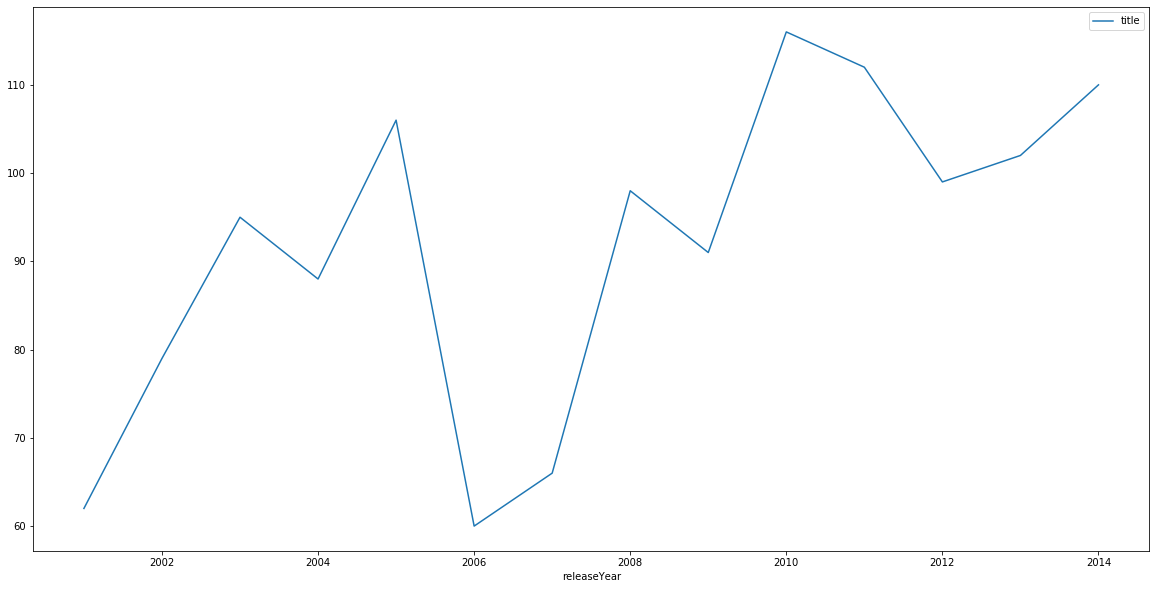

In [399]:
movies = Final_Movie[['title','releaseYear']]
movies = movies.groupby('releaseYear').agg('count')

movies.plot(kind = 'line')

#plt.plot_date(dates, y, linestyle ='solid')

2006 has least movies in a year released and 2010 has maximum movies released.

# Number of hits per year

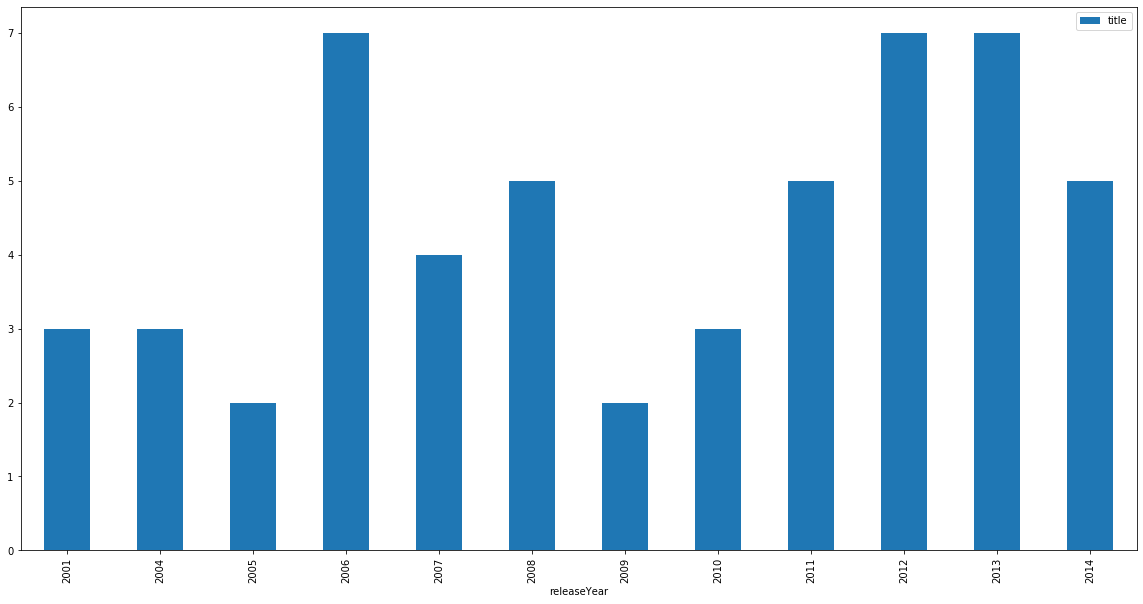

In [400]:
Hit_Movies = Final_Movie[['title','releaseYear','releaseDate','hitFlop']]
Hit_Movies = Hit_Movies[Hit_Movies['hitFlop'] > 6]
Hit_Movies
Hit = Hit_Movies[['title','releaseYear']]
Hit = Hit.groupby('releaseYear').agg('count').sort_values('releaseYear')
Hit.plot(kind = 'bar')


2006, 2012 , 2013 has maximum hit movies and 2009 has minimum hit movies.

# Creating list from Actors column and making multiple rows

In [401]:
Final_Movie_Actors = Final_Movie.copy()

In [402]:

# Split strings into list
    
Final_Movie_Actors['Actor'] = Final_Movie['actors'].str.split('|')


# Convert list into seperate rows

Final_Movie_Actors = Final_Movie_Actors.explode('Actor')

#Removed un-necessary columns
Final_Movie_Actors = Final_Movie_Actors.drop(['actors','imdbId'],axis = 'columns')

# Remove all  spaces
Final_Movie_Actors['Actor'] = Final_Movie_Actors['Actor'].str.strip()

Final_Movie_Actors

,title,releaseYear,releaseDate,genre,writers,directors,sequel,hitFlop,Actor
0,Albela,2001,2001-04-20,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Deepak Sareen,0.0,2,Govinda
0,Albela,2001,2001-04-20,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Deepak Sareen,0.0,2,Aishwarya Rai Bachchan
0,Albela,2001,2001-04-20,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Deepak Sareen,0.0,2,Jackie Shroff
0,Albela,2001,2001-04-20,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Deepak Sareen,0.0,2,Namrata Shirodkar
1,Lagaan: Once Upon a Time in India,2001,2002-05-08,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Ashutosh Gowariker,0.0,6,Aamir Khan
...,...,...,...,...,...,...,...,...,...
1282,Koi Hai,2003,2003-06-06,Drama | Horror,Manoj Hansraj | Rajiv S.S. Ruia,Rajiv S. Ruia,0.0,1,Roop Kumar Rathod
1283,Hansa,2012,2012-12-28,Drama,NaN,Manav Kaul,0.0,1,Trimala Adhikari
1283,Hansa,2012,2012-12-28,Drama,NaN,Manav Kaul,0.0,1,Abhay Joshi
1283,Hansa,2012,2012-12-28,Drama,NaN,Manav Kaul,0.0,1,Ashish Kumar


In [403]:
# Pulled Actors information from Actor Data set

Movie_Actors_Ratings = pd.merge(Final_Movie_Actors,csv_file_actors,how = 'inner',left_on = 'Actor',right_on = 'actorName')

In [404]:
Movie_Actors_Ratings

,title,releaseYear,releaseDate,genre,writers,directors,sequel,hitFlop,Actor,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
0,Albela,2001,2001-04-20,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Deepak Sareen,0.0,2,Govinda,413,Govinda,17,680,2.95652,1430000,4.68565,4.78557
1,Pyaar Diwana Hota Hai,2002,2002-04-26,Romance,S.M. Ahale (screenplay) | Shashi (story) | Jav...,Kirti Kumar,0.0,1,Govinda,413,Govinda,17,680,2.95652,1430000,4.68565,4.78557
2,Jodi No.1,2001,2001-04-13,Comedy,Rumi Jaffery (dialogue) | Imtiaz Patel (screen...,David Dhawan,0.0,6,Govinda,413,Govinda,17,680,2.95652,1430000,4.68565,4.78557
3,Aamdani Atthanni Kharcha Rupaiya,2001,2001-12-21,Comedy,Anwar Khan (dialogue) | V. Shekhar (story),K. Raghavendra Rao | A.S. Ravindra Babu,0.0,3,Govinda,413,Govinda,17,680,2.95652,1430000,4.68565,4.78557
4,Akhiyon Se Goli Maare,2002,2002-08-02,Comedy,Rajeev Kaul (screenplay) | Rajeev Kaul (story)...,Harmesh Malhotra,0.0,2,Govinda,413,Govinda,17,680,2.95652,1430000,4.68565,4.78557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,Finding Fanny,2014,2014-09-12,Comedy | Drama | Romance,Homi Adajania | Kersi Khambatta,Homi Adajania,0.0,2,Arjun Kapoor,390,Arjun Kapoor,5,320,5.30435,1690000,5.35640,6.50594
3122,Jannat 2,2012,2012-05-04,Crime | Drama | Thriller,Kapil Chopra | Sanjay Masoom (dialogue),Kunal Deshmukh,1.0,5,Mohammed Zeeshan Ayyub,468,Mohammed Zeeshan Ayyub,4,230,4.66848,0,0.00000,3.09077
3123,Raanjhanaa,2013,2013-06-21,Drama | Romance,Himanshu Sharma,Aanand Rai,0.0,6,Mohammed Zeeshan Ayyub,468,Mohammed Zeeshan Ayyub,4,230,4.66848,0,0.00000,3.09077
3124,Maazii,2013,2013-09-27,Thriller,Sumit Nijhawan | Shirish Sharma,Jaideep Chopra,0.0,1,Mohammed Zeeshan Ayyub,468,Mohammed Zeeshan Ayyub,4,230,4.66848,0,0.00000,3.09077


In [405]:
# Grouping Actor rankings griuping by Movies

Movie_Actors_Ranking_groupBy = Movie_Actors_Ratings.groupby('title')[['movieCount','ratingSum','normalizedMovieRank','googleHits','normalizedGoogleRank','normalizedRating']].describe().reset_index()


Movie_Actors_Ranking_groupBy.columns = Movie_Actors_Ranking_groupBy.columns.map('_A_'.join)


Movie_Actors_Ranking_groupBy
                                                 

,title_A_,movieCount_A_count,movieCount_A_mean,movieCount_A_std,movieCount_A_min,movieCount_A_25%,movieCount_A_50%,movieCount_A_75%,movieCount_A_max,ratingSum_A_count,ratingSum_A_mean,ratingSum_A_std,ratingSum_A_min,ratingSum_A_25%,ratingSum_A_50%,ratingSum_A_75%,ratingSum_A_max,normalizedMovieRank_A_count,normalizedMovieRank_A_mean,normalizedMovieRank_A_std,normalizedMovieRank_A_min,normalizedMovieRank_A_25%,normalizedMovieRank_A_50%,normalizedMovieRank_A_75%,normalizedMovieRank_A_max,googleHits_A_count,googleHits_A_mean,googleHits_A_std,googleHits_A_min,googleHits_A_25%,googleHits_A_50%,googleHits_A_75%,googleHits_A_max,normalizedGoogleRank_A_count,normalizedGoogleRank_A_mean,normalizedGoogleRank_A_std,normalizedGoogleRank_A_min,normalizedGoogleRank_A_25%,normalizedGoogleRank_A_50%,normalizedGoogleRank_A_75%,normalizedGoogleRank_A_max,normalizedRating_A_count,normalizedRating_A_mean,normalizedRating_A_std,normalizedRating_A_min,normalizedRating_A_25%,normalizedRating_A_50%,normalizedRating_A_75%,normalizedRating_A_max
0,...Yahaan,4.0,12.000000,5.416026,8.0,9.5,10.0,12.50,20.0,4.0,400.000000,232.091936,220.0,280.0,320.0,440.0,740.0,4.0,2.186143,0.411905,1.73370,1.917120,2.173915,2.442937,2.66304,4.0,1.783000e+05,1.093781e+05,43200.0,136800.0,180000.0,221500.0,310000.0,4.0,1.456545,0.282169,1.10802,1.349483,1.460930,1.567992,1.79630,4.0,2.506145,0.341191,2.18903,2.222112,2.515615,2.799648,2.80432
1,13B: Fear Has a New Address,3.0,10.333333,2.081666,8.0,9.5,11.0,11.50,12.0,3.0,400.000000,200.748599,260.0,285.0,310.0,470.0,630.0,3.0,2.734193,1.269240,1.80040,2.011615,2.222830,3.201090,4.17935,3.0,4.463333e+05,6.042933e+05,34000.0,99500.0,165000.0,652500.0,1140000.0,3.0,2.148010,1.558946,1.08428,1.253255,1.422230,2.679875,3.93752,3.0,3.212580,1.611181,2.07413,2.290815,2.507500,3.781805,5.05611
2,16 December,3.0,14.000000,16.462078,4.0,4.5,5.0,19.00,33.0,3.0,443.333333,438.900141,180.0,190.0,200.0,575.0,950.0,3.0,2.786560,1.055108,1.85968,2.212450,2.565220,3.250000,3.93478,3.0,3.366667e+04,5.831238e+04,0.0,0.0,0.0,50500.0,101000.0,3.0,0.419043,0.725804,0.00000,0.000000,0.000000,0.628565,1.25713,3.0,2.257037,0.392733,1.89206,2.049245,2.206430,2.439525,2.67262
3,1920: Evil Returns,3.0,5.666667,2.081666,4.0,4.5,5.0,6.50,8.0,3.0,230.000000,10.000000,220.0,225.0,230.0,235.0,240.0,3.0,3.339673,1.329752,1.85598,2.797555,3.739130,4.081520,4.42391,3.0,3.366667e+04,5.831238e+04,0.0,0.0,0.0,50500.0,101000.0,3.0,0.419043,0.725804,0.00000,0.000000,0.000000,0.628565,1.25713,3.0,2.572273,0.373660,2.20432,2.382715,2.561110,2.756250,2.95139
4,2 October,2.0,12.000000,2.828427,10.0,11.0,12.0,13.00,14.0,2.0,375.000000,35.355339,350.0,362.5,375.0,387.5,400.0,2.0,2.152950,0.444685,1.83851,1.995730,2.152950,2.310170,2.46739,2.0,5.940000e+04,4.426488e+04,28100.0,43750.0,59400.0,75050.0,90700.0,2.0,1.149805,0.114191,1.06906,1.109432,1.149805,1.190178,1.23055,2.0,2.312410,0.188359,2.17922,2.245815,2.312410,2.379005,2.44560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,Zindagi Na Milegi Dobara,4.0,14.500000,5.802298,6.0,13.5,16.5,17.50,19.0,4.0,1035.000000,521.568148,370.0,850.0,1065.0,1250.0,1640.0,4.0,5.922980,1.833096,4.24371,4.867995,5.483695,6.538680,8.48082,4.0,1.717500e+06,1.038408e+06,240000.0,1455000.0,1990000.0,2252500.0,2650000.0,4.0,5.427340,2.678861,1.61572,4.750150,6.130330,6.807520,7.83298,4.0,6.898945,2.302115,3.76953,5.911725,7.438865,8.426085,8.94852
1137,Zindagi Tere Naam,1.0,23.000000,NaN,23.0,23.0,23.0,23.00,23.0,1.0,720.000000,NaN,720.0,720.0,720.0,720.0,720.0,1.0,2.105860,NaN,2.10586,2.105860,2.105860,2.105860,2.10586,1.0,1.600000e+05,NaN,160000.0,160000.0,160000.0,160000.0,160000.0,1.0,1.409330,NaN,1.40933,1.409330,1.409330,1.409330,1.40933,1.0,2.433480,NaN,2.43348,2.433480,2.433480,2.433480,2.43348
1138,Zokkomon,3.0,17.000000,16.822604,4.0,7.5,11.0,23.50,36.0,3.0,623.333333,60

# Creating multiple rows wirh each director

In [406]:
Final_Movie_Directors = Final_Movie.copy()


In [407]:
# Split strings into list

Final_Movie_Directors['Director'] = Final_Movie['directors'].str.split('|')

# Convert list into seperate rows

Final_Movie_Directors = Final_Movie_Directors.explode('Director')

#Removed un-necessary columns

Final_Movie_Directors = Final_Movie_Directors.drop(['directors','imdbId'],axis = 'columns')

# Remove all  spaces

#Final_Movie_Actors['Director'] = Final_Movie_Actors['Director'].str.strip()

Final_Movie_Directors

,title,releaseYear,releaseDate,genre,writers,actors,sequel,hitFlop,Director
0,Albela,2001,2001-04-20,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,0.0,2,Deepak Sareen
1,Lagaan: Once Upon a Time in India,2001,2002-05-08,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,0.0,6,Ashutosh Gowariker
2,Meri Biwi Ka Jawab Nahin,2004,2004-07-02,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,0.0,1,Pankaj Parashar
2,Meri Biwi Ka Jawab Nahin,2004,2004-07-02,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,0.0,1,S.M. Iqbal
3,Hum Tumhare Hain Sanam,2002,2002-05-24,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,0.0,4,K.S. Adiyaman
...,...,...,...,...,...,...,...,...,...
1279,Sanam Hum Aapke Hain...,2009,2009-01-01,Drama | Romance,Dhananjay (dialogues) | Murari Kishan (lyrics)...,Vikram Aditya | Narendra Bedi | Chandan | Arad...,0.0,1,Ajay Ojha
1280,9 Eleven,2011,2011-10-07,Thriller,Manan Katohora,Kashmira Shah | Devasish Ray | Jyoti Singh | S...,0.0,1,Manan Katohora
1281,Hum Do Anjaane,2011,2011-05-27,Action | Crime | Drama,Milind Swamy (screenplay) | Milind Swamy (story),Naresh Kaura | Ankita Bhargava | Jackie Shroff...,0.0,1,Milind Swamy
1282,Koi Hai,2003,2003-06-06,Drama | Horror,Manoj Hansraj | Rajiv S.S. Ruia,Aman Verma | Shweta Menon | Rinku Ghosh | Roop...,0.0,1,Rajiv S. Ruia


In [408]:
# Pulled Actors information from Director Data set

Final_Movie_Directors = pd.merge(Final_Movie_Directors,Directors,how = 'inner',left_on = 'Director',right_on = 'directorName')

In [409]:
Final_Movie_Directors

,title,releaseYear,releaseDate,genre,writers,actors,sequel,hitFlop,Director,directorId,directorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
0,Lagaan: Once Upon a Time in India,2001,2002-05-08,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,0.0,6,Ashutosh Gowariker,31,Ashutosh Gowariker,5,250,3.13158,460000,4.41586,3.74808
1,Swades,2004,2004-12-17,Drama,M.G. Sathya (story) | Ashutosh Gowariker (stor...,Shah Rukh Khan | Gayatri Joshi | Kishori Balal...,0.0,2,Ashutosh Gowariker,31,Ashutosh Gowariker,5,250,3.13158,460000,4.41586,3.74808
2,Jodhaa Akbar,2008,2008-02-15,Action | Adventure | Biography,Haidar Ali (story) | Haidar Ali (screenplay) |...,Hrithik Roshan | Aishwarya Rai Bachchan | Sonu...,0.0,5,Ashutosh Gowariker,31,Ashutosh Gowariker,5,250,3.13158,460000,4.41586,3.74808
3,What's Your Raashee?,2009,2009-10-02,Comedy | Drama | Romance,Ashutosh Gowariker (screenplay) | Naushil Meht...,Harman Baweja | Priyanka Chopra | Anjan Srivas...,0.0,1,Ashutosh Gowariker,31,Ashutosh Gowariker,5,250,3.13158,460000,4.41586,3.74808
4,Khelein Hum Jee Jaan Sey,2010,2010-12-03,Action | Drama | History,Javed Akhtar (lyrics) | Ashutosh Gowariker (sc...,Abhishek Bachchan | Deepika Padukone | Sikande...,0.0,1,Ashutosh Gowariker,31,Ashutosh Gowariker,5,250,3.13158,460000,4.41586,3.74808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,Riyasat,2014,2014-07-18,Crime,NaN,Rajesh Khanna | Aryeman Ramsay | Raza Murad | ...,0.0,1,Ashok Tyagi,109,Ashok Tyagi,3,60,1.00000,51200,1.37213,1.07152
520,It's Rocking: Dard-E-Disco,2012,2012-11-09,Comedy,NaN,Asrani | Arun Bakshi | Dinesh Hingoo | Preeti ...,0.0,1,Ashok Tyagi,109,Ashok Tyagi,3,60,1.00000,51200,1.37213,1.07152
521,Ya Rab,2014,2014-02-07,Drama,NaN,Indrapal Ahuja | Neha Baam | Vikram Dahiya | R...,0.0,1,Hasnain Hyderabadwala,93,Hasnain Hyderabadwala,4,100,1.35526,1780,1.00417,1.34663
522,Duplicate Sholay,2002,2002-04-26,Comedy,NaN,Devaraj | Dimple | Feroz | Reena Kapoor,0.0,2,Kanti Shah,97,Kanti Shah,6,130,1.11842,93300,1.68558,1.24841


In [410]:
Movie_Directors_Ranking_groupBy = Final_Movie_Directors.groupby('title')[['movieCount','ratingSum','normalizedMovieRank','googleHits','normalizedGoogleRank','normalizedRating']].describe().reset_index()

In [411]:
# Combining header and first row

Movie_Directors_Ranking_groupBy.columns = Movie_Directors_Ranking_groupBy.columns.map('_B_'.join)

In [412]:
Movie_Directors_Ranking_groupBy

,title_B_,movieCount_B_count,movieCount_B_mean,movieCount_B_std,movieCount_B_min,movieCount_B_25%,movieCount_B_50%,movieCount_B_75%,movieCount_B_max,ratingSum_B_count,ratingSum_B_mean,ratingSum_B_std,ratingSum_B_min,ratingSum_B_25%,ratingSum_B_50%,ratingSum_B_75%,ratingSum_B_max,normalizedMovieRank_B_count,normalizedMovieRank_B_mean,normalizedMovieRank_B_std,normalizedMovieRank_B_min,normalizedMovieRank_B_25%,normalizedMovieRank_B_50%,normalizedMovieRank_B_75%,normalizedMovieRank_B_max,googleHits_B_count,googleHits_B_mean,googleHits_B_std,googleHits_B_min,googleHits_B_25%,googleHits_B_50%,googleHits_B_75%,googleHits_B_max,normalizedGoogleRank_B_count,normalizedGoogleRank_B_mean,normalizedGoogleRank_B_std,normalizedGoogleRank_B_min,normalizedGoogleRank_B_25%,normalizedGoogleRank_B_50%,normalizedGoogleRank_B_75%,normalizedGoogleRank_B_max,normalizedRating_B_count,normalizedRating_B_mean,normalizedRating_B_std,normalizedRating_B_min,normalizedRating_B_25%,normalizedRating_B_50%,normalizedRating_B_75%,normalizedRating_B_max
0,...Yahaan,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,1.0,180.0,NaN,180.0,180.0,180.0,180.0,180.0,1.0,3.84211,NaN,3.84211,3.84211,3.84211,3.84211,3.84211,1.0,27800.0,NaN,27800.0,27800.0,27800.0,27800.0,27800.0,1.0,1.19790,NaN,1.19790,1.19790,1.19790,1.19790,1.19790,1.0,3.81346,NaN,3.81346,3.81346,3.81346,3.81346,3.81346
1,16 December,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,1.0,140.0,NaN,140.0,140.0,140.0,140.0,140.0,1.0,1.56842,NaN,1.56842,1.56842,1.56842,1.56842,1.56842,1.0,542000.0,NaN,542000.0,542000.0,542000.0,542000.0,542000.0,1.0,5.02639,NaN,5.02639,5.02639,5.02639,5.02639,5.02639,1.0,2.34056,NaN,2.34056,2.34056,2.34056,2.34056,2.34056
2,1920,1.0,16.0,NaN,16.0,16.0,16.0,16.0,16.0,1.0,640.0,NaN,640.0,640.0,640.0,640.0,640.0,1.0,2.42105,NaN,2.42105,2.42105,2.42105,2.42105,2.42105,1.0,356000.0,NaN,356000.0,356000.0,356000.0,356000.0,356000.0,1.0,3.64152,NaN,3.64152,3.64152,3.64152,3.64152,3.64152,1.0,2.90282,NaN,2.90282,2.90282,2.90282,2.90282,2.90282
3,23rd March 1931: Shaheed,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,1.0,120.0,NaN,120.0,120.0,120.0,120.0,120.0,1.0,1.28421,NaN,1.28421,1.28421,1.28421,1.28421,1.28421,1.0,5370.0,NaN,5370.0,5370.0,5370.0,5370.0,5370.0,1.0,1.03090,NaN,1.03090,1.03090,1.03090,1.03090,1.03090,1.0,1.28246,NaN,1.28246,1.28246,1.28246,1.28246,1.28246
4,3 Bachelors,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,1.0,60.0,NaN,60.0,60.0,60.0,60.0,60.0,1.0,1.00000,NaN,1.00000,1.00000,1.00000,1.00000,1.00000,1.0,14800.0,NaN,14800.0,14800.0,14800.0,14800.0,14800.0,1.0,1.10111,NaN,1.10111,1.10111,1.10111,1.10111,1.10111,1.0,1.01857,NaN,1.01857,1.01857,1.01857,1.01857,1.01857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,Zinda,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,1.0,180.0,NaN,180.0,180.0,180.0,180.0,180.0,1.0,2.13684,NaN,2.13684,2.13684,2.13684,2.13684,2.13684,1.0,937000.0,NaN,937000.0,937000.0,937000.0,937000.0,937000.0,1.0,7.96737,NaN,7.96737,7.96737,7.96737,7.96737,7.96737,1.0,3.47027,NaN,3.47027,3.47027,3.47027,3.47027,3.47027
520,Zindaggi Rocks,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,1.0,60.0,NaN,60.0,60.0,60.0,60.0,60.0,1.0,1.00000,NaN,1.00000,1.00000,1.00000,1.00000,1.00000,1.0,64400.0,NaN,64400.0,64400.0,64400.0,64400.0,64400.0,1.0,1.47041,NaN,1.47041,1.47041,1.47041,1.47041,1.47041,1.0,1.09071,NaN,1.09071,1.09071,1.09071,1.09071,1.09071
521,Zindagi 50 50,1.0,6.0,NaN,6.0,6.0,6.0,6.0,6.0,1.0,130.0,NaN,130.0,130.0,130.0,130.0,130.0,1.0,1.11842,NaN,1.11842,1.11842,1.11842,1.11842,1.11842,1.0,6430.0,NaN,6430.0,6430.0,6430.0,6430.0,6430.0,1.0,1.03879,NaN,1.03879,1.03879,1.03879,1.03879,1.03879,1.0,1.12207,NaN,1.12207,1.12207,1.12207,1.12207,1.12207
522,Zindagi Na Milegi Dobara,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,1.0,160.0,NaN,160.0,160.0,160.0,160.0,160.0,1.0,3.36842,NaN,3.36842,3.36842,3.36842,3.36842,3.36842,1.0,98600.0,NaN,98600.0,98600.0,98600.0,98600.0,98600.0,1.0,1.72505,NaN,1.72505,1.

# Getting Directors ranking dataframe combined with Actors Ranking Dataframe

In [413]:
Actor_Director_Rankings = pd.merge(Movie_Directors_Ranking_groupBy,Movie_Actors_Ranking_groupBy,how = 'inner',left_on = 'title_B_',right_on = 'title_A_')

In [414]:
Actor_Director_Rankings

,title_B_,movieCount_B_count,movieCount_B_mean,movieCount_B_std,movieCount_B_min,movieCount_B_25%,movieCount_B_50%,movieCount_B_75%,movieCount_B_max,ratingSum_B_count,ratingSum_B_mean,ratingSum_B_std,ratingSum_B_min,ratingSum_B_25%,ratingSum_B_50%,ratingSum_B_75%,ratingSum_B_max,normalizedMovieRank_B_count,normalizedMovieRank_B_mean,normalizedMovieRank_B_std,normalizedMovieRank_B_min,normalizedMovieRank_B_25%,normalizedMovieRank_B_50%,normalizedMovieRank_B_75%,normalizedMovieRank_B_max,googleHits_B_count,googleHits_B_mean,googleHits_B_std,googleHits_B_min,googleHits_B_25%,googleHits_B_50%,googleHits_B_75%,googleHits_B_max,normalizedGoogleRank_B_count,normalizedGoogleRank_B_mean,normalizedGoogleRank_B_std,normalizedGoogleRank_B_min,normalizedGoogleRank_B_25%,normalizedGoogleRank_B_50%,normalizedGoogleRank_B_75%,normalizedGoogleRank_B_max,normalizedRating_B_count,normalizedRating_B_mean,normalizedRating_B_std,normalizedRating_B_min,normalizedRating_B_25%,normalizedRating_B_50%,normalizedRating_B_75%,normalizedRating_B_max,title_A_,movieCount_A_count,movieCount_A_mean,movieCount_A_std,movieCount_A_min,movieCount_A_25%,movieCount_A_50%,movieCount_A_75%,movieCount_A_max,ratingSum_A_count,ratingSum_A_mean,ratingSum_A_std,ratingSum_A_min,ratingSum_A_25%,ratingSum_A_50%,ratingSum_A_75%,ratingSum_A_max,normalizedMovieRank_A_count,normalizedMovieRank_A_mean,normalizedMovieRank_A_std,normalizedMovieRank_A_min,normalizedMovieRank_A_25%,normalizedMovieRank_A_50%,normalizedMovieRank_A_75%,normalizedMovieRank_A_max,googleHits_A_count,googleHits_A_mean,googleHits_A_std,googleHits_A_min,googleHits_A_25%,googleHits_A_50%,googleHits_A_75%,googleHits_A_max,normalizedGoogleRank_A_count,normalizedGoogleRank_A_mean,normalizedGoogleRank_A_std,normalizedGoogleRank_A_min,normalizedGoogleRank_A_25%,normalizedGoogleRank_A_50%,normalizedGoogleRank_A_75%,normalizedGoogleRank_A_max,normalizedRating_A_count,normalizedRating_A_mean,normalizedRating_A_std,normalizedRating_A_min,normalizedRating_A_25%,normalizedRating_A_50%,normalizedRating_A_75%,normalizedRating_A_max
0,...Yahaan,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,1.0,180.0,NaN,180.0,180.0,180.0,180.0,180.0,1.0,3.84211,NaN,3.84211,3.84211,3.84211,3.84211,3.84211,1.0,27800.0,NaN,27800.0,27800.0,27800.0,27800.0,27800.0,1.0,1.19790,NaN,1.19790,1.19790,1.19790,1.19790,1.19790,1.0,3.81346,NaN,3.81346,3.81346,3.81346,3.81346,3.81346,...Yahaan,4.0,12.000000,5.416026,8.0,9.50,10.0,12.5,20.0,4.0,400.000000,232.091936,220.0,280.0,320.0,440.0,740.0,4.0,2.186143,0.411905,1.73370,1.917120,2.173915,2.442937,2.66304,4.0,1.783000e+05,1.093781e+05,43200.0,136800.0,180000.0,221500.0,310000.0,4.0,1.456545,0.282169,1.10802,1.349483,1.460930,1.567992,1.79630,4.0,2.506145,0.341191,2.18903,2.222112,2.515615,2.799648,2.80432
1,16 December,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,1.0,140.0,NaN,140.0,140.0,140.0,140.0,140.0,1.0,1.56842,NaN,1.56842,1.56842,1.56842,1.56842,1.56842,1.0,542000.0,NaN,542000.0,542000.0,542000.0,542000.0,542000.0,1.0,5.02639,NaN,5.02639,5.02639,5.02639,5.02639,5.02639,1.0,2.34056,NaN,2.34056,2.34056,2.34056,2.34056,2.34056,16 December,3.0,14.000000,16.462078,4.0,4.50,5.0,19.0,33.0,3.0,443.333333,438.900141,180.0,190.0,200.0,575.0,950.0,3.0,2.786560,1.055108,1.85968,2.212450,2.565220,3.250000,3.93478,3.0,3.366667e+04,5.831238e+04,0.0,0.0,0.0,50500.0,101000.0,3.0,0.419043,0.725804,0.00000,0.000000,0.000000,0.628565,1.25713,3.0,2.257037,0.392733,1.89206,2.049245,2.206430,2.439525,2.67262
2,23rd March 1931: Shaheed,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,1.0,120.0,NaN,120.0,120.0,120.0,120.0,120.0,1.0,1.28421,NaN,1.28421,1.28421,1.28421,1.28421,1.28421,1.0,5370.0,NaN,5370.0,5370.0,5370.0,5370.0,5370.0,1.0,1.03090,NaN,1.03090,1.03090,1.03090,1.03090,1.03090,1.0,1.28246,NaN,1.28246,1.28246,1.28246,1.28246,1.28246,23rd March 1931: Shaheed,3.0,19.333333,8.962886,9.0,16.50,24.0,24.5,25.0,3.0,593.333333,340.342964,210.0,460.0,710.0,785.0,860.0,3.0,1.890763,0.542816,1.32609,1.631795,1.937500,2.173100,2.40870,3.0,5.010000e+05,2.468117e+05,2

In [415]:
Movie_filtered = Final_Movie.copy()

In [416]:
Movie_filtered = Movie_filtered.drop(['imdbId','writers','actors','directors'],axis = 1)

In [417]:
Movie_filtered

,title,releaseYear,releaseDate,genre,sequel,hitFlop
0,Albela,2001,2001-04-20,Romance,0.0,2
1,Lagaan: Once Upon a Time in India,2001,2002-05-08,Adventure | Drama | Musical,0.0,6
2,Meri Biwi Ka Jawab Nahin,2004,2004-07-02,Action | Comedy,0.0,1
3,Hum Tumhare Hain Sanam,2002,2002-05-24,Drama | Romance,0.0,4
4,One 2 Ka 4,2001,2001-03-30,Action | Comedy | Drama,0.0,1
...,...,...,...,...,...,...
1279,Sanam Hum Aapke Hain...,2009,2009-01-01,Drama | Romance,0.0,1
1280,9 Eleven,2011,2011-10-07,Thriller,0.0,1
1281,Hum Do Anjaane,2011,2011-05-27,Action | Crime | Drama,0.0,1
1282,Koi Hai,2003,2003-06-06,Drama | Horror,0.0,1


In [418]:
Combined_data = pd.merge(Movie_filtered,Actor_Director_Rankings,how = 'inner',left_on ='title',right_on = 'title_B_')

In [419]:
Combined_data

,title,releaseYear,releaseDate,genre,sequel,hitFlop,title_B_,movieCount_B_count,movieCount_B_mean,movieCount_B_std,movieCount_B_min,movieCount_B_25%,movieCount_B_50%,movieCount_B_75%,movieCount_B_max,ratingSum_B_count,ratingSum_B_mean,ratingSum_B_std,ratingSum_B_min,ratingSum_B_25%,ratingSum_B_50%,ratingSum_B_75%,ratingSum_B_max,normalizedMovieRank_B_count,normalizedMovieRank_B_mean,normalizedMovieRank_B_std,normalizedMovieRank_B_min,normalizedMovieRank_B_25%,normalizedMovieRank_B_50%,normalizedMovieRank_B_75%,normalizedMovieRank_B_max,googleHits_B_count,googleHits_B_mean,googleHits_B_std,googleHits_B_min,googleHits_B_25%,googleHits_B_50%,googleHits_B_75%,googleHits_B_max,normalizedGoogleRank_B_count,normalizedGoogleRank_B_mean,normalizedGoogleRank_B_std,normalizedGoogleRank_B_min,normalizedGoogleRank_B_25%,normalizedGoogleRank_B_50%,normalizedGoogleRank_B_75%,normalizedGoogleRank_B_max,normalizedRating_B_count,normalizedRating_B_mean,normalizedRating_B_std,normalizedRating_B_min,normalizedRating_B_25%,normalizedRating_B_50%,normalizedRating_B_75%,normalizedRating_B_max,title_A_,movieCount_A_count,movieCount_A_mean,movieCount_A_std,movieCount_A_min,movieCount_A_25%,movieCount_A_50%,movieCount_A_75%,movieCount_A_max,ratingSum_A_count,ratingSum_A_mean,ratingSum_A_std,ratingSum_A_min,ratingSum_A_25%,ratingSum_A_50%,ratingSum_A_75%,ratingSum_A_max,normalizedMovieRank_A_count,normalizedMovieRank_A_mean,normalizedMovieRank_A_std,normalizedMovieRank_A_min,normalizedMovieRank_A_25%,normalizedMovieRank_A_50%,normalizedMovieRank_A_75%,normalizedMovieRank_A_max,googleHits_A_count,googleHits_A_mean,googleHits_A_std,googleHits_A_min,googleHits_A_25%,googleHits_A_50%,googleHits_A_75%,googleHits_A_max,normalizedGoogleRank_A_count,normalizedGoogleRank_A_mean,normalizedGoogleRank_A_std,normalizedGoogleRank_A_min,normalizedGoogleRank_A_25%,normalizedGoogleRank_A_50%,normalizedGoogleRank_A_75%,normalizedGoogleRank_A_max,normalizedRating_A_count,normalizedRating_A_mean,normalizedRating_A_std,normalizedRating_A_min,normalizedRating_A_25%,normalizedRating_A_50%,normalizedRating_A_75%,normalizedRating_A_max
0,Lagaan: Once Upon a Time in India,2001,2002-05-08,Adventure | Drama | Musical,0.0,6,Lagaan: Once Upon a Time in India,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,1.0,250.0,NaN,250.0,250.0,250.0,250.0,250.0,1.0,3.13158,NaN,3.13158,3.13158,3.13158,3.13158,3.13158,1.0,460000.0,NaN,460000.0,460000.0,460000.0,460000.0,460000.0,1.0,4.41586,NaN,4.41586,4.41586,4.41586,4.41586,4.41586,1.0,3.74808,NaN,3.74808,3.74808,3.74808,3.74808,3.74808,Lagaan: Once Upon a Time in India,2.0,10.000000,1.414214,9.0,9.50,10.0,10.50,11.0,2.0,780.000000,551.543289,390.0,585.0,780.0,975.0,1170.0,2.0,6.365615,4.360027,3.28261,4.824112,6.365615,7.907117,9.44862,2.0,1.332000e+06,1.595233e+06,204000.0,768000.0,1332000.0,1896000.0,2460000.0,2.0,4.432835,4.115355,1.52284,2.977838,4.432835,5.887833,7.34283,2.0,6.584420,4.830360,3.16884,4.876630,6.584420,8.292210,10.00000
1,One 2 Ka 4,2001,2001-03-30,Action | Comedy | Drama,0.0,1,One 2 Ka 4,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,1.0,140.0,NaN,140.0,140.0,140.0,140.0,140.0,1.0,2.89474,NaN,2.89474,2.89474,2.89474,2.89474,2.89474,1.0,1480.0,NaN,1480.0,1480.0,1480.0,1480.0,1480.0,1.0,1.00194,NaN,1.00194,1.00194,1.00194,1.00194,1.00194,1.0,2.84985,NaN,2.84985,2.84985,2.84985,2.84985,2.84985,One 2 Ka 4,3.0,20.333333,6.429101,13.0,18.00,23.0,24.00,25.0,3.0,1066.666667,820.325139,460.0,600.0,740.0,1370.0,2000.0,3.0,3.998080,3.089116,1.93913,2.222075,2.505020,5.027555,7.55009,3.0,1.168000e+06,1.302546e+06,349000.0,417000.0,485000.0,1577500.0,2670000.0,3.0,4.009750,3.360283,1.89691,2.072335,2.247760,5.066170,7.88458,3.0,4.993967,3.674986,2.61634,2.877580,3.138820,6.182780,9.22674
2,Devdas,2002,2002-07-12,Musical | Romance,0.0,6,Devdas,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,1.0,300.0,NaN,300.0,300.0,300.0,300.0,300.0,1.0,3.84211,NaN,3.84211,3.84211,3.84211,3.84211,3.84211,1.0,790000.0,NaN,790000.0,790000.0,790000.0,790000.0,790000.0,1.0,6.87288,NaN,6.87288,6.87288,6

In [420]:
pd.set_option('display.max_columns',None)

Movie_B_ - stands for director details 

Movie_A_ - stands for actor details.

In [421]:
Combined_data = Combined_data.drop(['movieCount_B_std','title_B_','movieCount_B_25%','movieCount_B_count','movieCount_B_75%','normalizedRating_A_75%','normalizedRating_A_25%','normalizedRating_A_std','normalizedGoogleRank_A_75%','normalizedGoogleRank_A_25%',
                   'normalizedGoogleRank_A_std','ratingSum_B_std','ratingSum_B_25%','ratingSum_B_75%','ratingSum_B_count',
                    'normalizedMovieRank_B_std','normalizedMovieRank_B_25%','normalizedMovieRank_B_75%','normalizedMovieRank_B_count',
                   'googleHits_B_std','googleHits_B_25%','normalizedGoogleRank_B_count','googleHits_B_75%','normalizedGoogleRank_B_std','normalizedGoogleRank_B_25%','normalizedGoogleRank_B_75%',
                   'normalizedRating_B_std','normalizedRating_B_25%','normalizedRating_B_count','normalizedRating_B_75%','title_A_','movieCount_A_std','movieCount_A_25%','movieCount_A_75%',
                   'ratingSum_A_count','googleHits_B_count','ratingSum_A_std','ratingSum_A_25%','ratingSum_A_75%','normalizedMovieRank_A_count','normalizedMovieRank_A_std',
                   'normalizedMovieRank_A_25%','normalizedMovieRank_A_75%','googleHits_A_count','googleHits_A_std','googleHits_A_25%','googleHits_A_75%',
                   'normalizedGoogleRank_A_count','normalizedRating_A_count','movieCount_B_50%','ratingSum_B_50%','normalizedMovieRank_B_50%','googleHits_B_50%','normalizedGoogleRank_B_50%',
                   'normalizedRating_B_50%','movieCount_A_50%','ratingSum_A_50%','normalizedMovieRank_A_50%','googleHits_A_50%','normalizedGoogleRank_A_50%',
                   'normalizedRating_A_50%','movieCount_B_min','ratingSum_B_min','normalizedMovieRank_B_min','googleHits_B_min',
                         'googleHits_B_min' ,'normalizedGoogleRank_B_min','movieCount_A_min','ratingSum_A_min','normalizedMovieRank_A_min',
                                   'googleHits_A_min','normalizedGoogleRank_A_min','normalizedRating_A_min','movieCount_B_mean','ratingSum_B_mean',
                                   'normalizedRating_B_min','normalizedMovieRank_B_mean','normalizedMovieRank_A_mean','normalizedMovieRank_A_max',
                                   'normalizedMovieRank_B_mean','normalizedMovieRank_B_max','normalizedGoogleRank_B_mean','googleHits_B_mean','normalizedGoogleRank_A_mean'
                                   ,'normalizedRating_B_mean','googleHits_A_mean','normalizedRating_A_mean'],axis = 1)

In [422]:
#top5 = Combined_data[['title','googleHits_A_max']].sort_values('googleHits_A_max',ascending = False)[:30]
#top5=top5.set_index('title')
#top5.plot(kind = 'bar')

# Any relation with director google hits and hitflop?

In [423]:
y = Combined_data['hitFlop']
x = Combined_data['googleHits_B_max']

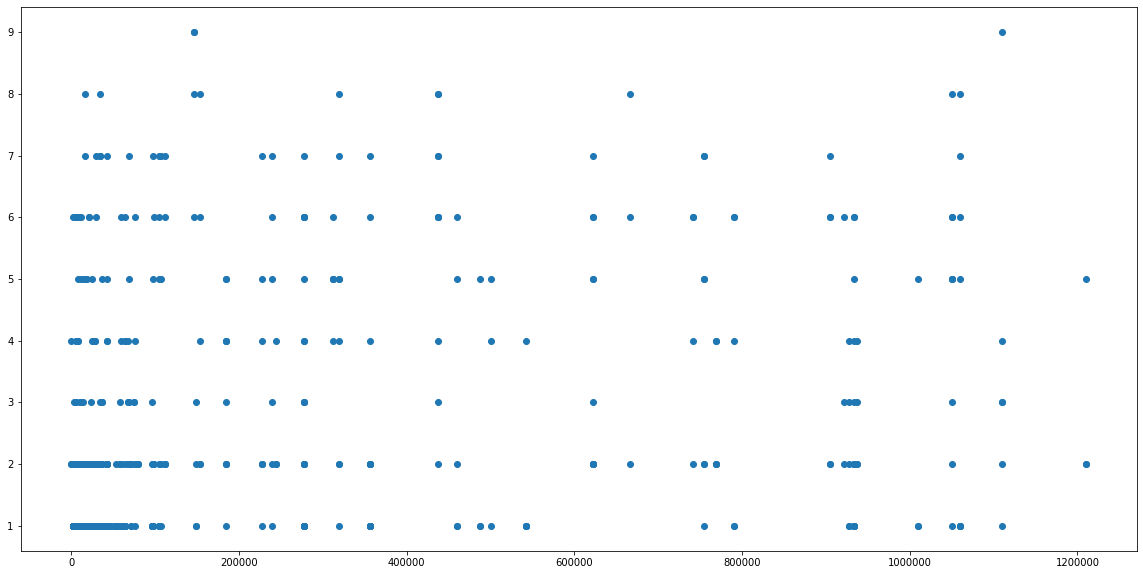

In [424]:
plt.scatter(x,y)

 There is no linear relationship between two variables here.

# Any relation with star movie actors google hits and hitflop?

In [425]:
y = Combined_data['hitFlop']
x = Combined_data['googleHits_A_max']

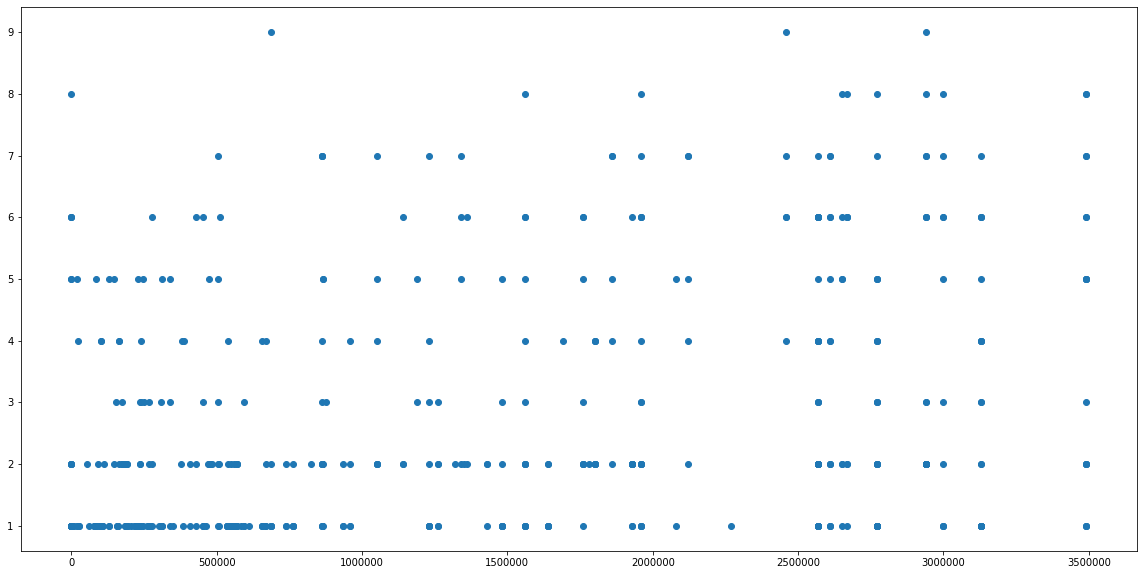

In [426]:
plt.scatter(x,y)

 There is no linear relationship between two variables here.

# Any relation with Movies rating sum and hitflop?

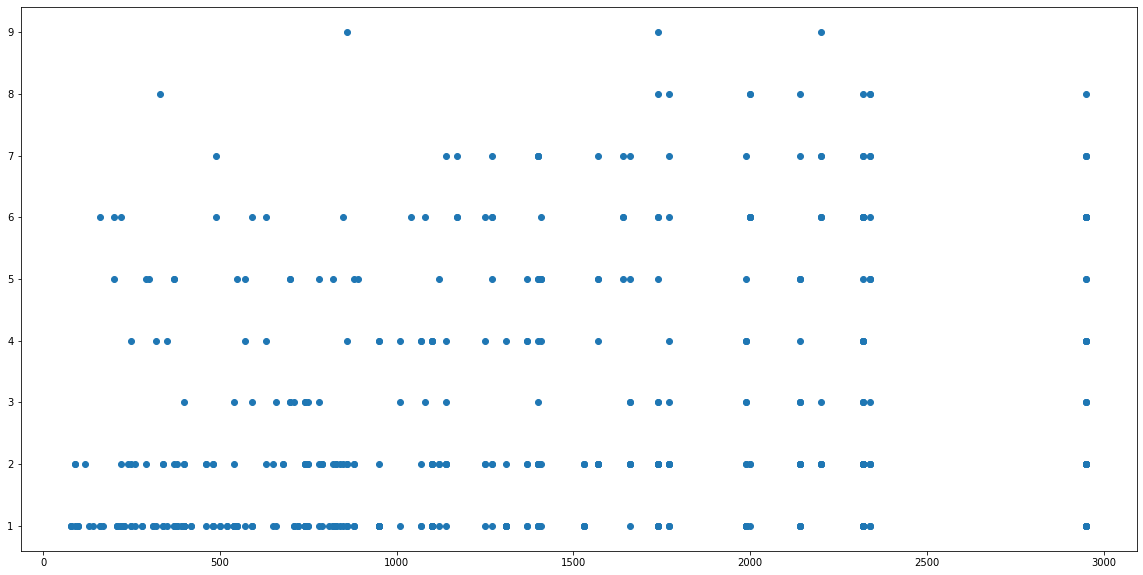

In [427]:
y = Combined_data['hitFlop']
x = Combined_data['ratingSum_A_max']
plt.scatter(x,y)

 There is no linear relationship between two variables here.

# Any relation with Normalised rating of an star Mvie actor and hitflop?

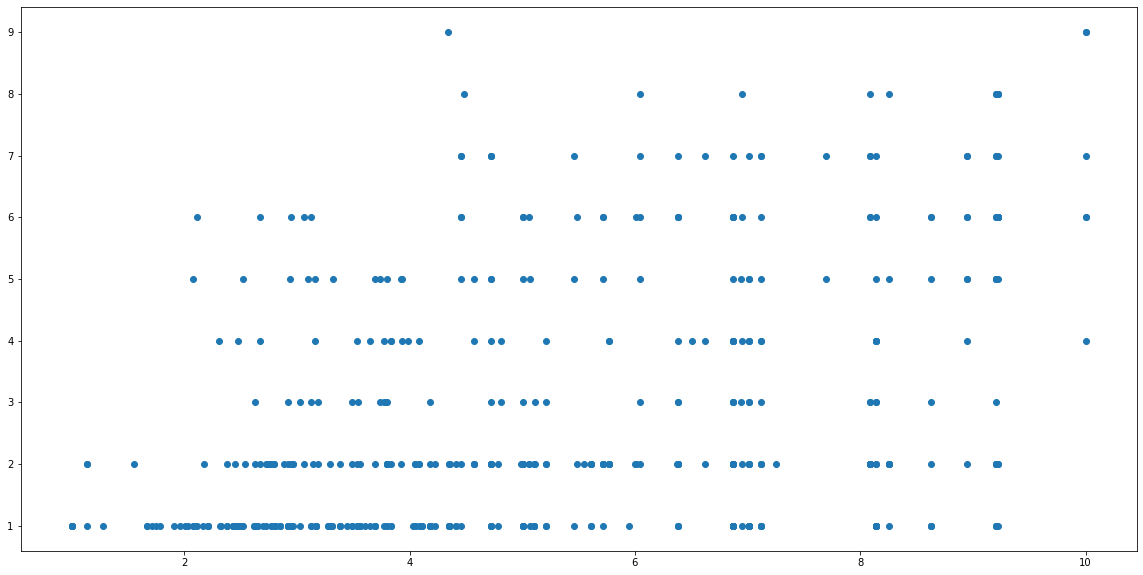

In [428]:
y = Combined_data['hitFlop']
x = Combined_data['normalizedRating_A_max']
plt.scatter(x,y)

In [429]:
Combined_data.head(1)

,title,releaseYear,releaseDate,genre,sequel,hitFlop,movieCount_B_max,ratingSum_B_max,googleHits_B_max,normalizedGoogleRank_B_max,normalizedRating_B_max,movieCount_A_count,movieCount_A_mean,movieCount_A_max,ratingSum_A_mean,ratingSum_A_max,googleHits_A_max,normalizedGoogleRank_A_max,normalizedRating_A_max
0,Lagaan: Once Upon a Time in India,2001,2002-05-08,Adventure | Drama | Musical,0.0,6,5.0,250.0,460000.0,4.41586,3.74808,2.0,10.0,11.0,780.0,1170.0,2460000.0,7.34283,10.0


There is no linear relationship between two variables here.

# Correlation Matrix

In [430]:
Combined_data.corr()

,releaseYear,sequel,hitFlop,movieCount_B_max,ratingSum_B_max,googleHits_B_max,normalizedGoogleRank_B_max,normalizedRating_B_max,movieCount_A_count,movieCount_A_mean,movieCount_A_max,ratingSum_A_mean,ratingSum_A_max,googleHits_A_max,normalizedGoogleRank_A_max,normalizedRating_A_max
releaseYear,1.000000,0.179103,0.059005,-0.023678,0.048855,0.048623,0.049491,0.137528,-0.226082,-0.078281,-0.113853,0.005440,-0.060541,-0.046848,-0.052548,0.014767
sequel,0.179103,1.000000,0.207865,0.075364,0.132658,0.085876,0.086245,0.148852,-0.035558,-0.013141,-0.005899,0.016000,0.000020,-0.022475,-0.027469,0.001750
hitFlop,0.059005,0.207865,1.000000,0.089407,0.368440,0.240442,0.240043,0.620631,0.215397,0.124570,0.185216,0.305789,0.309397,0.324203,0.318527,0.435261
movieCount_B_max,-0.023678,0.075364,0.089407,1.000000,0.856211,0.243123,0.244546,0.163066,0.118478,0.199505,0.205276,0.187710,0.207164,0.104249,0.104406,0.083308
ratingSum_B_max,0.048855,0.132658,0.368440,0.856211,1.000000,0.330525,0.331556,0.570378,0.200307,0.293578,0.319183,0.349522,0.364136,0.278126,0.277813,0.291129
googleHits_B_max,0.048623,0.085876,0.240442,0.243123,0.330525,1.000000,0.999541,0.573620,0.018139,0.119851,0.102180,0.202078,0.146906,0.249721,0.244162,0.265613
normalizedGoogleRank_B_max,0.049491,0.086245,0.240043,0.244546,0.331556,0.999541,1.000000,0.573609,0.018102,0.119609,0.102120,0.201283,0.146266,0.247591,0.242044,0.263695
normalizedRating_B_max,0.137528,0.148852,0.620631,0.163066,0.570378,0.573620,0.573609,1.000000,0.211198,0.267429,0.309986,0.414790,0.393549,0.432564,0.430702,0.505629
movieCount_A_count,-0.226082,-0.035558,0.215397,0.118478,0.200307,0.018139,0.018102,0.211198,1.000000,0.262290,0.476043,0.268425,0.473042,0.427487,0.443873,0.432526
movieCount_A_mean,-0.078281,-0.013141,0.124570,0.199505,0.293578,0.119851,0.119609,0.267429,0.262290,1.000000,0.876327,0.933405,0.825013,0.636427,0.646954,0.564682


# Getting Month and day from reseased date 

In [431]:
Combined_data['Month'] = pd.DatetimeIndex(Combined_data['releaseDate']).month
Combined_data['Month'] = Combined_data['Month'].apply(str)

Combined_data['Day'] = pd.DatetimeIndex(Combined_data['releaseDate']).day
Combined_data['Day'] = Combined_data['Day'].apply(str)

In [432]:
Combined_data.head(1)

,title,releaseYear,releaseDate,genre,sequel,hitFlop,movieCount_B_max,ratingSum_B_max,googleHits_B_max,normalizedGoogleRank_B_max,normalizedRating_B_max,movieCount_A_count,movieCount_A_mean,movieCount_A_max,ratingSum_A_mean,ratingSum_A_max,googleHits_A_max,normalizedGoogleRank_A_max,normalizedRating_A_max,Month,Day
0,Lagaan: Once Upon a Time in India,2001,2002-05-08,Adventure | Drama | Musical,0.0,6,5.0,250.0,460000.0,4.41586,3.74808,2.0,10.0,11.0,780.0,1170.0,2460000.0,7.34283,10.0,5,8


In [433]:
Combined_data['Month-Day']= Combined_data['Month']  +" - "+ Combined_data['Day']

In [434]:
Combined_data.head(1)

,title,releaseYear,releaseDate,genre,sequel,hitFlop,movieCount_B_max,ratingSum_B_max,googleHits_B_max,normalizedGoogleRank_B_max,normalizedRating_B_max,movieCount_A_count,movieCount_A_mean,movieCount_A_max,ratingSum_A_mean,ratingSum_A_max,googleHits_A_max,normalizedGoogleRank_A_max,normalizedRating_A_max,Month,Day,Month-Day
0,Lagaan: Once Upon a Time in India,2001,2002-05-08,Adventure | Drama | Musical,0.0,6,5.0,250.0,460000.0,4.41586,3.74808,2.0,10.0,11.0,780.0,1170.0,2460000.0,7.34283,10.0,5,8,5 - 8


# Making movies mark that released on christmas,Independence day and Republic day 

In [435]:
Combined_data['Christmas'] = Combined_data['Month-Day'].copy()



for row_index,row in Combined_data.iterrows():
    if Combined_data['Month-Day'][row_index] == '12 - 25':
        Combined_data['Christmas'][row_index] = 1
    else:
        Combined_data['Christmas'][row_index] = 0
        
   

                

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [436]:
Combined_data['Independence Day'] = Combined_data['Month-Day'].copy()

for row_index,row in Combined_data.iterrows():
    if Combined_data['Month-Day'][row_index] == '8 - 15':
        Combined_data['Independence Day'][row_index] = 1
    else:
        Combined_data['Independence Day'][row_index] = 0

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [437]:
Combined_data['Republic Day'] = Combined_data['Month-Day'].copy()
for row_index,row in Combined_data.iterrows():
    if Combined_data['Month-Day'][row_index] == '1 - 26':
        Combined_data['Republic Day'][row_index] = 1
    else:
        Combined_data['Republic Day'][row_index] = 0


C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [438]:
Combined_data = Combined_data.drop(['Day','Month','Month-Day'],axis =1)

# Assigning 1 for movies having hit/flop rank more than 5 and 0 for less than 5

In [439]:
Combined_data['Hit'] = Combined_data['hitFlop'] .copy()

for row_index,row in Combined_data.iterrows() : 
    if Combined_data['hitFlop'][row_index] < 5.0 :
        Combined_data['Hit'][row_index] = 0
    else : 
        Combined_data['Hit'][row_index] = 1

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [440]:
Combined_data.head(1)

,title,releaseYear,releaseDate,genre,sequel,hitFlop,movieCount_B_max,ratingSum_B_max,googleHits_B_max,normalizedGoogleRank_B_max,normalizedRating_B_max,movieCount_A_count,movieCount_A_mean,movieCount_A_max,ratingSum_A_mean,ratingSum_A_max,googleHits_A_max,normalizedGoogleRank_A_max,normalizedRating_A_max,Christmas,Independence Day,Republic Day,Hit
0,Lagaan: Once Upon a Time in India,2001,2002-05-08,Adventure | Drama | Musical,0.0,6,5.0,250.0,460000.0,4.41586,3.74808,2.0,10.0,11.0,780.0,1170.0,2460000.0,7.34283,10.0,0,0,0,1


In [441]:
Combined_data = Combined_data.drop(['releaseYear','releaseDate','genre','hitFlop','title'],axis =1)

In [442]:
Combined_data.head(1)

,sequel,movieCount_B_max,ratingSum_B_max,googleHits_B_max,normalizedGoogleRank_B_max,normalizedRating_B_max,movieCount_A_count,movieCount_A_mean,movieCount_A_max,ratingSum_A_mean,ratingSum_A_max,googleHits_A_max,normalizedGoogleRank_A_max,normalizedRating_A_max,Christmas,Independence Day,Republic Day,Hit
0,0.0,5.0,250.0,460000.0,4.41586,3.74808,2.0,10.0,11.0,780.0,1170.0,2460000.0,7.34283,10.0,0,0,0,1


                                           MODEL CREATION

# Dividing  data into train and test

In [443]:
from sklearn.model_selection import train_test_split

In [444]:
X = Combined_data
Y = Combined_data['Hit']

In [445]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,train_size  = 0.8)

In [448]:
Hit_X = X_train[X_train['Hit'] == 1]
Hit_X.count()

sequel                        88
movieCount_B_max              88
ratingSum_B_max               88
googleHits_B_max              88
normalizedGoogleRank_B_max    88
normalizedRating_B_max        88
movieCount_A_count            88
movieCount_A_mean             88
movieCount_A_max              88
ratingSum_A_mean              88
ratingSum_A_max               88
googleHits_A_max              88
normalizedGoogleRank_A_max    88
normalizedRating_A_max        88
Christmas                     88
Independence Day              88
Republic Day                  88
Hit                           88
dtype: int64

In [449]:
X  = pd.concat([Hit_X]*2, ignore_index=True)

In [450]:
X_test = X_test.drop(['Hit'],axis =1 )

## Train data has less number of "1" compared to "0" in required out put
     Adding more data points with rows having "1"

In [451]:
X.count()

sequel                        176
movieCount_B_max              176
ratingSum_B_max               176
googleHits_B_max              176
normalizedGoogleRank_B_max    176
normalizedRating_B_max        176
movieCount_A_count            176
movieCount_A_mean             176
movieCount_A_max              176
ratingSum_A_mean              176
ratingSum_A_max               176
googleHits_A_max              176
normalizedGoogleRank_A_max    176
normalizedRating_A_max        176
Christmas                     176
Independence Day              176
Republic Day                  176
Hit                           176
dtype: int64

In [452]:
X_train = pd.concat([X_train , X])

In [453]:
X_train = X_train.drop(['Hit'],axis = 1)

In [454]:
X_train.count()

sequel                        575
movieCount_B_max              575
ratingSum_B_max               575
googleHits_B_max              575
normalizedGoogleRank_B_max    575
normalizedRating_B_max        575
movieCount_A_count            575
movieCount_A_mean             575
movieCount_A_max              575
ratingSum_A_mean              575
ratingSum_A_max               575
googleHits_A_max              575
normalizedGoogleRank_A_max    575
normalizedRating_A_max        575
Christmas                     575
Independence Day              575
Republic Day                  575
dtype: int64

In [455]:
Hit_y = Y_train[Y_train ==1]
Hit_y.count()

88

In [456]:
y = pd.concat([Hit_y]*2, ignore_index=True)
y.count()

176

In [457]:
Y_train = pd.concat([Y_train , y])
Y_train.count()

575

# 1. Logistic Regression

In [458]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [459]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [460]:
Y_pred = logreg.predict(X_test)

In [461]:
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
print(round(acc_log,2), "%")

58.0 %


# 2.KNN 

In [462]:

from sklearn.neighbors import KNeighborsClassifier



In [463]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
print(round(acc_knn,2,), "%")

63.0 %


# 3. Random Forest


In [464]:
from sklearn.ensemble import RandomForestClassifier

In [465]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_test, Y_test)
acc_random_forest = round(random_forest.score(X_test ,Y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

83.0 %


# 4. Dcision Tree

In [466]:
from sklearn.tree import DecisionTreeClassifier

In [467]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
print(round(acc_decision_tree,2,), "%")

77.0 %


# 5. Specific Vector Machine


In [468]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

62.61 %


C:\Users\prana\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# K-fold Cross Validation

 # On Random Forest

In [469]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

In [470]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.93103448 0.93103448 0.89655172 0.93103448 0.94827586 0.9122807
 0.92982456 0.9122807  0.94736842 0.89473684]
Mean: 0.9234422262552935
Standard Deviation: 0.017886002866154167


__Average score is  92 % with Std. deviation of 2 %__

In [471]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=1,
                                   

In [472]:
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

# Best model based on parameter tuning.

In [473]:
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 2,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_test, Y_test)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 92.17 %


   # Performance Calculation

# 1.Confusion Matrix

In [474]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[260,  51],
       [  0, 264]], dtype=int64)

260 were correctly classified as true positives and 264 were classified as tru negatives. 51 were classified as false positives.

# 2 . Precision and Recall

In [475]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8380952380952381
Recall: 1.0


This model predicts 83% of the time about movie is Hit correctly. The recall tells us that it predicted the movie is 100% hit out of actually hit movies.

# 3. F Score

In [476]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.9119170984455958